# Training Model

# Import Library

In [9]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util
import yaml

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import json
from datetime import datetime
from sklearn.metrics import classification_report
import uuid

import lightgbm as lgb
from sklearn.model_selection import cross_val_score

In [10]:
params_dir = "config/config.yaml"

In [11]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [12]:
params = load_params(params_dir)

In [13]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_feng_set_path': ['dataset/2 - processed/X_train_feng.pkl',
  'dataset/2 - processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['dataset/2 - processed/X_valid_feng.pkl',
  'dataset/2 - processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['dataset/2 - processed/X_test_feng.pkl',
  'dataset/2 - processed/y_test_feng.pkl'],
 'impute_data_train': ['dataset/2 - processed/X_train_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_test': ['dataset/2 - processed/X_test_impute.pkl',
  'dataset/2 - processed/y_test_impute.pkl'],
 'impute_data_valid': ['dataset/2 - processed/X_valid_impute.pkl',
  'dataset/2 - processed/y_valid_impute.pkl

In [14]:
config_data = util.load_config()

## Read Data

In [15]:
#Read data X_train dan y_sm hasil dari data preparation
X_ros_clean = util.pickle_load(config_data["standar_scaler_ros"][0])
y_ros = util.pickle_load(config_data["standar_scaler_ros"][1])

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = util.pickle_load(config_data["standar_scaler_valid"][0])
y_valid = util.pickle_load(config_data["standar_scaler_valid"][1])

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = util.pickle_load(config_data["standar_scaler_test"][0])
y_test = util.pickle_load(config_data["standar_scaler_test"][1])

In [16]:
X_ros_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,1.306988,-0.011981,0.003435,1.409191,0,1,0,0,1,0,1,1,1
1,1.493860,-1.336548,0.463506,0.610455,1,0,0,0,1,1,1,2,9
2,-0.748604,-1.336548,-0.630442,1.178883,1,0,0,0,1,1,1,2,7
3,-0.935476,-0.060350,-2.143566,-0.961045,0,1,0,1,0,1,0,1,8
4,0.185756,0.767652,1.230292,-1.408500,1,0,0,1,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,0.933244,0.254658,-0.773575,1.608396,0,1,0,1,0,1,1,3,8
11132,0.466064,0.860213,-2.378714,1.358060,0,1,1,0,0,0,0,3,9
11133,0.372628,0.561275,1.608573,1.546180,1,0,0,1,0,1,0,1,9
11134,0.466064,0.581646,0.831564,0.064106,0,1,0,1,0,1,0,1,5


In [17]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9970,0.092320,1.121917,-1.325661,0.330646,0,1,1,0,0,1,0,2,7
30,-0.187988,-1.336548,-0.579323,0.696635,1,0,0,0,1,1,0,3,3
7394,-1.776400,-1.336548,-1.315437,1.166592,1,0,1,0,0,0,1,1,8
3471,-1.309220,0.411349,-0.160146,-0.652763,1,0,1,0,0,1,1,1,3
7844,-0.281424,-1.336548,-0.364623,-1.580995,1,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-0.655168,0.844874,-1.305214,1.611777,0,1,1,0,0,1,1,1,4
681,1.587296,0.754705,-0.579323,0.640851,0,1,0,0,1,0,1,1,5
3983,0.279192,-1.336548,-0.221489,1.263142,1,0,1,0,0,0,1,1,2
6219,-0.374860,0.537692,-0.119251,-0.830090,0,1,0,0,1,1,0,1,1


In [18]:
X_valid_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
9970,0.092320,1.121917,-1.325661,0.330646,0,1,1,0,0,1,0,2,7
30,-0.187988,-1.336548,-0.579323,0.696635,1,0,0,0,1,1,0,3,3
7394,-1.776400,-1.336548,-1.315437,1.166592,1,0,1,0,0,0,1,1,8
3471,-1.309220,0.411349,-0.160146,-0.652763,1,0,1,0,0,1,1,1,3
7844,-0.281424,-1.336548,-0.364623,-1.580995,1,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-0.655168,0.844874,-1.305214,1.611777,0,1,1,0,0,1,1,1,4
681,1.587296,0.754705,-0.579323,0.640851,0,1,0,0,1,0,1,1,5
3983,0.279192,-1.336548,-0.221489,1.263142,1,0,1,0,0,0,1,1,2
6219,-0.374860,0.537692,-0.119251,-0.830090,0,1,0,0,1,1,0,1,1


In [19]:
y_valid

9970    0
30      1
7394    0
3471    0
7844    0
       ..
4085    0
681     0
3983    1
6219    0
6072    0
Name: Exited, Length: 1800, dtype: int64

In [20]:
X_test_clean

,Age,Balance,CreditScore,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,HasCrCard,IsActiveMember,NumOfProducts,Tenure
2755,-0.935476,-1.336548,0.535073,0.777888,0,1,0,0,1,0,1,2,7
4997,0.185756,-1.336548,0.759997,-0.967584,0,1,0,0,1,1,0,1,1
6555,-0.561732,-1.336548,-0.068132,-0.124471,0,1,1,0,0,1,0,2,5
5552,-0.001116,-1.336548,-0.211266,0.562164,0,1,1,0,0,1,0,2,3
796,0.466064,0.265957,0.555521,0.160352,1,0,1,0,0,0,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,0.652936,-1.336548,-0.129475,0.628648,1,0,0,0,1,1,1,2,2
1956,1.306988,0.597370,-0.845142,0.482430,0,1,1,0,0,1,1,2,4
7791,-0.935476,1.147886,-0.650890,-0.017758,1,0,0,1,0,1,0,1,6
8854,-0.187988,-1.336548,0.269254,-1.574651,1,0,0,0,1,1,1,2,6


In [21]:
y_test

2755    0
4997    1
6555    0
5552    0
796     0
       ..
7089    0
1956    1
7791    0
8854    0
918     0
Name: Exited, Length: 1200, dtype: int64

## LightGBM Classifier

In [22]:
def binary_classification_lgbm_tuned(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # set hyperparameters for tuning
    # instantiate the classifier
    best_lgbm_clf = lgb.LGBMClassifier(random_state=123)
    
    best_lgbm_clf.fit(X_ros_clean, y_ros)
    
    # evaluate on validation set
    valid_pred = best_lgbm_clf.predict(x_valid)
    report = classification_report(y_valid, valid_pred, output_dict=True)
    valid_recall = report['weighted avg']['recall']
    print('Validation recall:', valid_recall)
    
    # evaluate on test set
    test_pred = best_lgbm_clf.predict(x_test)
    report = classification_report(y_test, test_pred, output_dict=True)
    test_recall = report['weighted avg']['recall']
    print('Test recall:', test_recall)
    
    return best_lgbm_clf

In [23]:
lgbm_best = binary_classification_lgbm_tuned(x_train=X_ros_clean, y_train=y_ros,
                                              x_valid=X_valid_clean, y_valid=y_valid,
                                              x_test=X_test_clean, y_test=y_test)

Validation recall: 0.8327777777777777
Test recall: 0.8391666666666666


In [26]:
# Perform cross-validation
cross_val_scores = cross_val_score(lgbm_best, X_ros_clean, y_ros, cv=5, scoring='recall')

# Print the cross-validation scores
print("Cross-validation Scores:", cross_val_scores)
print("Average CV Score:", cross_val_scores.mean())

Cross-validation Scores: [0.88150808 0.90296496 0.90925427 0.91382406 0.90843806]
Average CV Score: 0.9031978849600204


In [27]:
valid_pred = lgbm_best.predict(X_valid_clean)
valid_acc = accuracy_score(y_valid, valid_pred)

In [28]:
valid_acc

0.8327777777777777

In [29]:
print(classification_report(y_valid, valid_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1437
           1       0.57      0.72      0.64       363

    accuracy                           0.83      1800
   macro avg       0.75      0.79      0.76      1800
weighted avg       0.85      0.83      0.84      1800



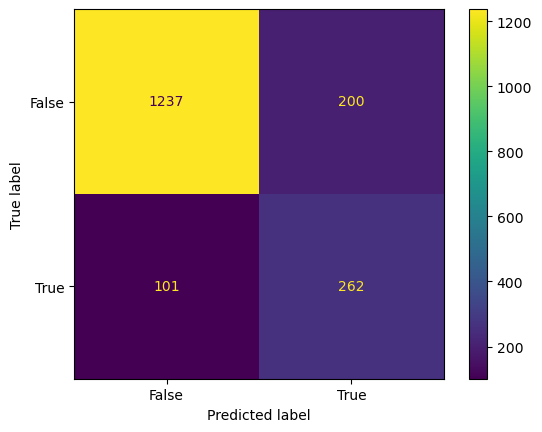

In [30]:
ConfusionMatrixDisplay.from_predictions(y_valid, valid_pred, display_labels = [False, True])
plt.show()

AUC: 0.8730299771294266


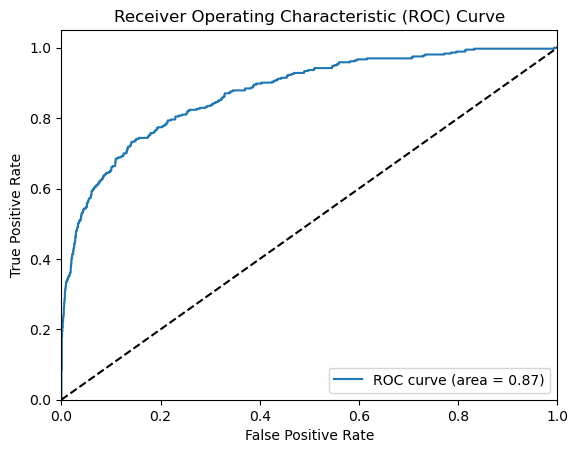

In [31]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = lgbm_best.predict_proba(X_valid_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_valid, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_auc.png')
plt.show()

In [32]:
test_pred = lgbm_best.predict(X_test_clean)
test_acc = accuracy_score(y_test, test_pred)

In [33]:
test_acc

0.8391666666666666

In [34]:
print(classification_report(y_test, test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       958
           1       0.58      0.75      0.65       242

    accuracy                           0.84      1200
   macro avg       0.75      0.81      0.77      1200
weighted avg       0.86      0.84      0.85      1200



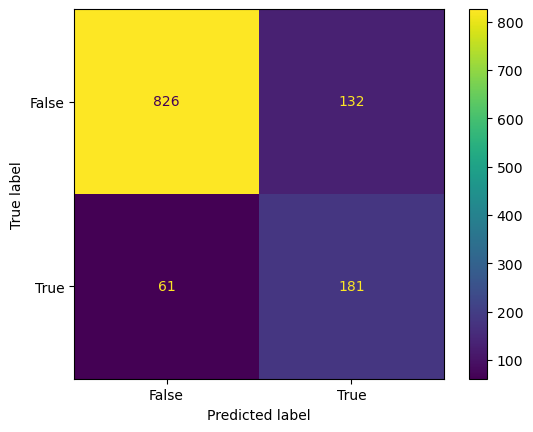

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels = [False, True])
plt.show()

AUC: 0.8744284753015061


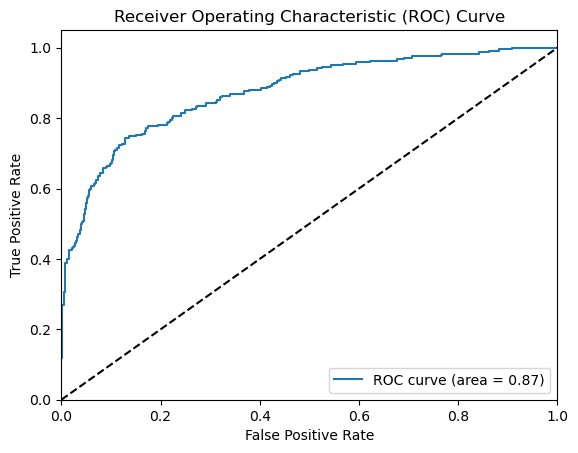

In [36]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the positive class
probs = lgbm_best.predict_proba(X_test_clean)[:, 1]

# calculate fpr and tpr for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_auc.png')
plt.show()

## Save Log Best Model

In [37]:
def save_model_log(model, model_name, X_test, y_test):
    # generate unique id
    model_uid = uuid.uuid4().hex
    
    # get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    # generate classification report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # create dictionary for log
    log = {"model_name": model_name,
           "model_uid": model_uid,
           "training_time": training_time,
           "training_date": training_date,
           "classification_report": report}
    
    # menyimpan log sebagai file JSON
    with open('training_log/training_log.json', 'w') as f:
        json.dump(log, f)

In [38]:
save_model_log(model = lgbm_best, model_name = "LightGBM Default", X_test = X_test_clean, y_test=y_test)

## Evaluation Metrics

In [39]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {
          'LGBM':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
LGBM,0.86005,0.839167,0.84636,0.839167,0.754752,0.805073,0.773823,0.86005,0.839167,0.84636


# Save Model

## LightGBM

In [40]:
lightGBM_default = 'model/5 - Model Final/lightGBM.pkl'
with open(lightGBM_default, 'wb') as file:
    pickle.dump(lgbm_best, file)

## Cara Load Model

In [1]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"""

"\nfilename = 'models/model.pkl'\nwith open(filename, 'rb') as file:\n    model = pickle.load(file)\n"